C:\Users\uhuyy\AppData\Local\Temp\ipykernel_13716\3704178103.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_plot.set_yticklabels(ytick_list, rotation=90)


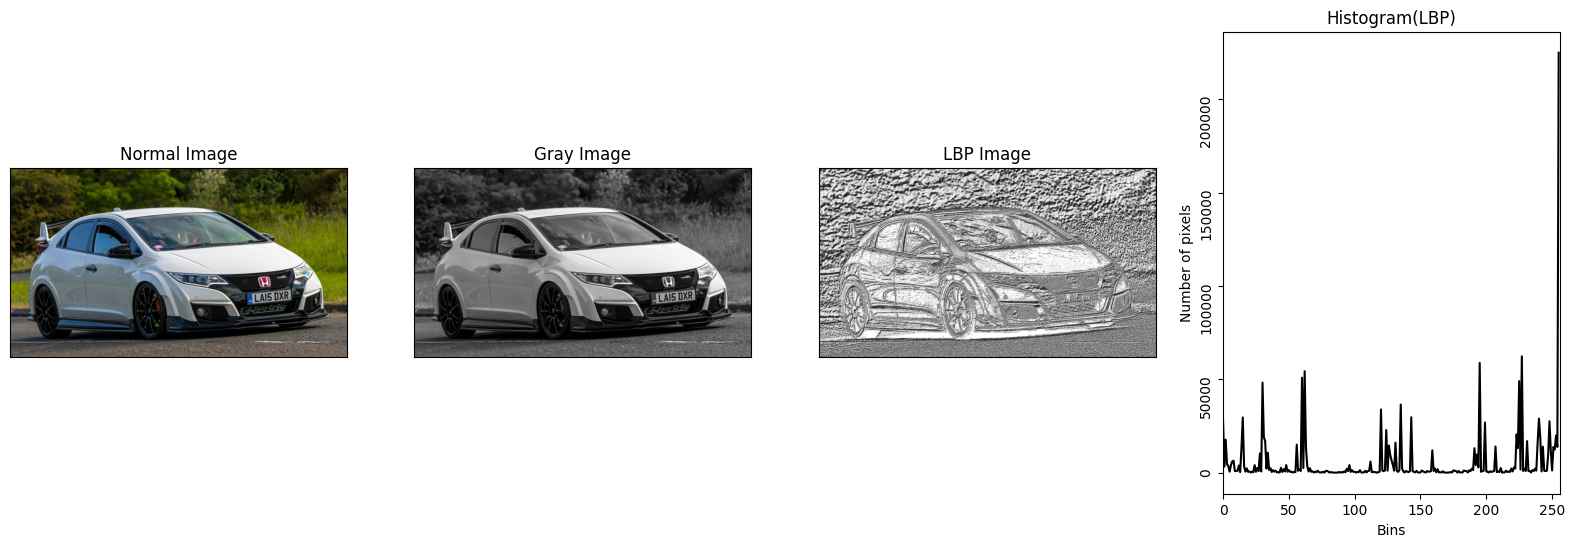

LBP Program selesai 


In [2]:
# muhamad lutfi alamsyah 1217070041
import cv2
import numpy as np
from matplotlib import pyplot as plt

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except IndexError:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
    Format :

     64 | 128 | 1
     ----------------
    32 | 0 | 2
     ----------------
     16 | 8 | 4
    '''
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1)) # top_right
    val_ar.append(get_pixel(img, center, x, y+1))   # right
    val_ar.append(get_pixel(img, center, x+1, y+1)) # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))   # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1)) # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))   # left
    val_ar.append(get_pixel(img, center, x-1, y-1)) # top_left
    val_ar.append(get_pixel(img, center, x-1, y))   # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        
        if current_type == "gray":
            current_plot.imshow(current_img, cmap=plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color="black")
            current_plot.set_xlim([0, 256])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list, rotation=90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
    
    plt.show()

image_file = 'mobil.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_lbp = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                   })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                   })
output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                   })
output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                   })

show_output(output_list)

print("LBP Program selesai ")

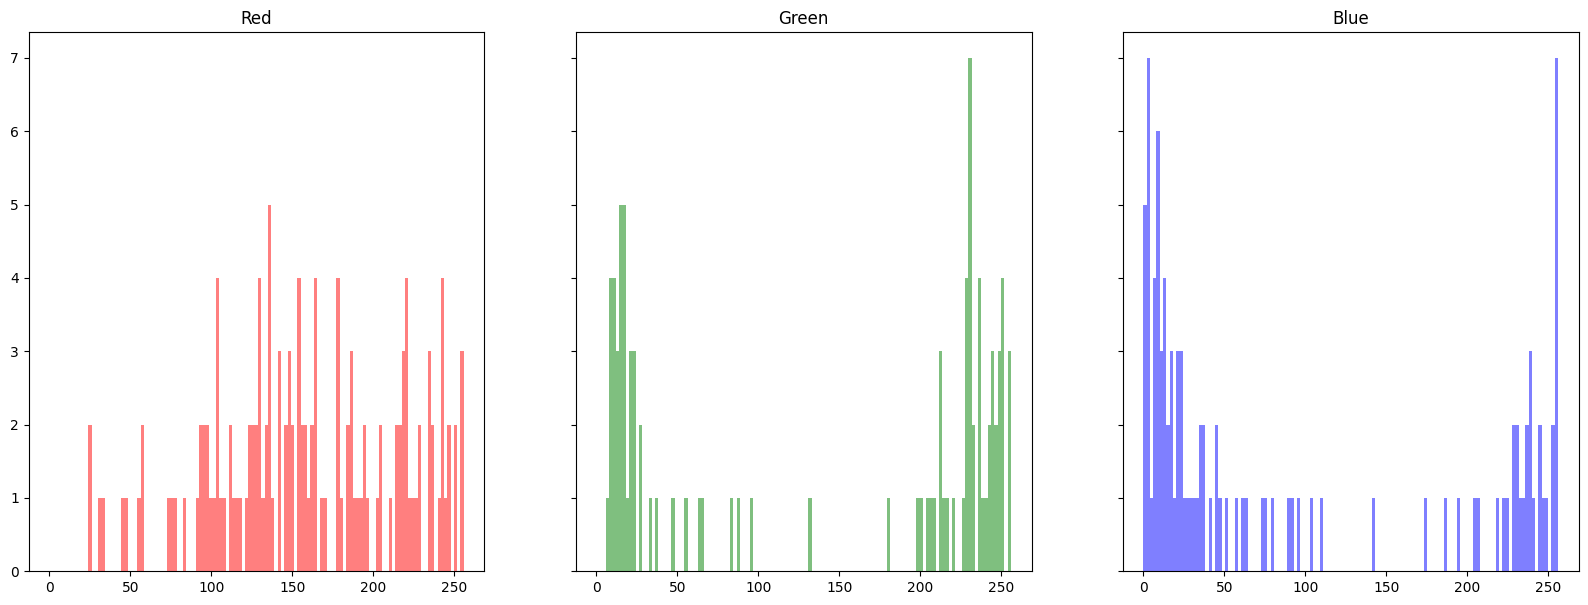

ValueError: x and y must have same first dimension, but have shapes (256,) and (768,)

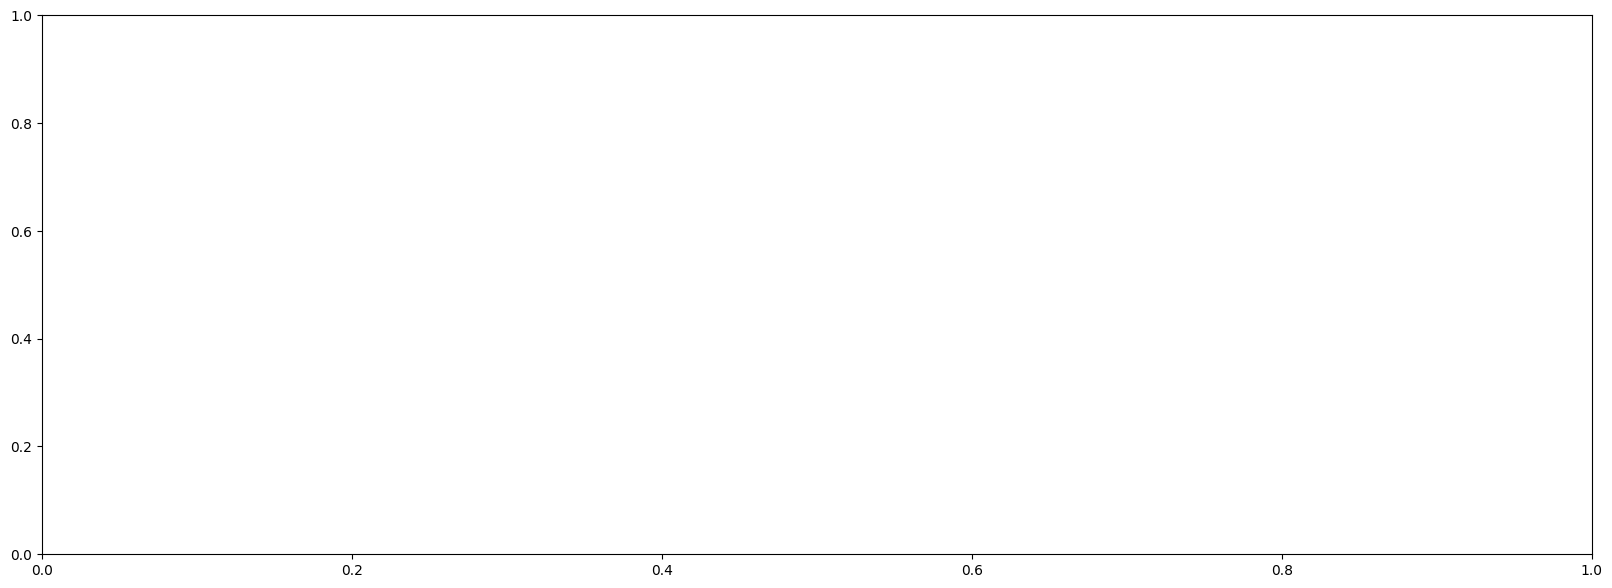

In [ ]:
#Muhamad Lutfi ALamsyah 1217070041
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load image and convert to RGB
img_bgr = cv2.imread("pool.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Get image dimensions
height, width, channel = img_bgr.shape

# Initialize histograms
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))

# Function to reset histograms
def makeItZero():
    global hgr, hgg, hgb
    hgr = np.zeros((256))
    hgg = np.zeros((256))
    hgb = np.zeros((256))

# Calculate histograms
for y in range(height):
    for x in range(width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

# Plotting histograms
def plot_result(red, green, blue):
    bins = np.linspace(0, 256, 128)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    
    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')
    
    ax1.hist(red, bins, color="red", alpha=0.5)
    ax2.hist(green, bins, color="green", alpha=0.5)
    ax3.hist(blue, bins, color="blue", alpha=0.5)
    
    plt.rcParams['figure.figsize'] = [20, 7]
    plt.show()

plot_result(hgr, hgg, hgb)

# Plotting combined RGB histogram
hgrgb = np.concatenate((hgr, hgg, hgb))
binsrgb = np.linspace(0, 768, 256)

plt.plot(binsrgb, hgrgb, color='black')
plt.title("Histogram Red Green Blue")
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
plt.show()

# Alternatively, using OpenCV calcHist for combined RGB histogram
hist_img = cv2.calcHist([img], [0, 1, 2], None, [256], [0, 256*3])
plt.plot(hist_img, color='black')
plt.title("Histogram Red Green Blue (OpenCV)")
plt.xlabel("Bins")
plt.ylabel("Number of pixels")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

PATCH_SIZE = 21

# Load image (using a built-in example for demonstration)
image = data.camera()

# Define locations for grass and sky patches
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = [image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE] for loc in grass_locations]

sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = [image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE] for loc in sky_locations]

# Compute GLCM for grass and sky patches
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Original image with patch locations
axs[0, 0].imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for (y, x) in grass_locations:
    axs[0, 0].plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    axs[0, 0].plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
axs[0, 0].set_xlabel('Original Image')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].axis('image')

# Plot (dissimilarity, correlation)
axs[0, 1].plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
axs[0, 1].plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
axs[0, 1].set_xlabel('GLCM Dissimilarity')
axs[0, 1].set_ylabel('GLCM Correlation')
axs[0, 1].legend()

# Display grass patches
for i, patch in enumerate(grass_patches):
    axs[1, i].imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    axs[1, i].set_xlabel('Grass %d' % (i + 1))

# Display sky patches
for i, patch in enumerate(sky_patches):
    axs[2, i].imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    axs[2, i].set_xlabel('Sky %d' % (i + 1))

# Adjust layout
plt.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()


ImportError: cannot import name 'greycomatrix' from 'skimage.feature' (C:\Users\uhuyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skimage\feature\__init__.py)

C:\Users\uhuyy\AppData\Local\Temp\ipykernel_9164\3063122395.py:13: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


Jumlah titik terdeteksi =  298


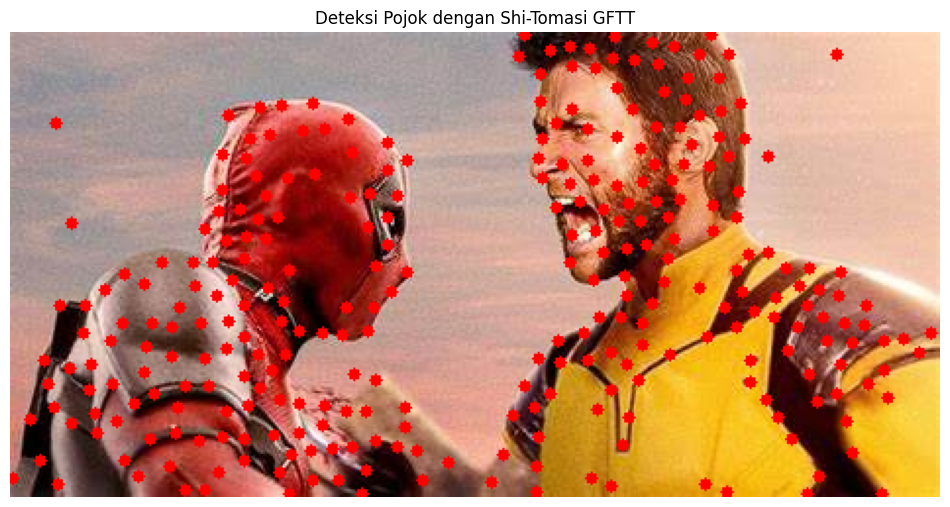

In [ ]:
# Muhamad Lutfi ALamsyah 1217070041
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Gunakan gambar
img = cv2.imread('pool.jpg')

# Konversi ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi pojok dengan Shi-Tomasi GFTT
corners = cv2.goodFeaturesToTrack(gray, 1000, 0.01, 10)
corners = np.int0(corners)

# Menampilkan jumlah titik terdeteksi
print("Jumlah titik terdeteksi = ", corners.shape[0])

# Ubah urutan band untuk ditampilkan di Matplotlib
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perbesar ukuran hasil plotting
plt.rcParams["figure.figsize"] = (12, 8)

# Untuk tiap pojok yang terdeteksi, munculkan pada gambar
for i in corners:
    x, y = i.ravel()
    cv2.circle(rgb, (x, y), 3, (255, 0, 0), -1)  # Lingkari pojok dengan warna biru

# Tampilkan gambar dengan pojok yang terdeteksi
plt.imshow(rgb)
plt.title('Deteksi Pojok dengan Shi-Tomasi GFTT')
plt.axis('off')  # Hilangkan sumbu x dan y
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\uhuyy\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

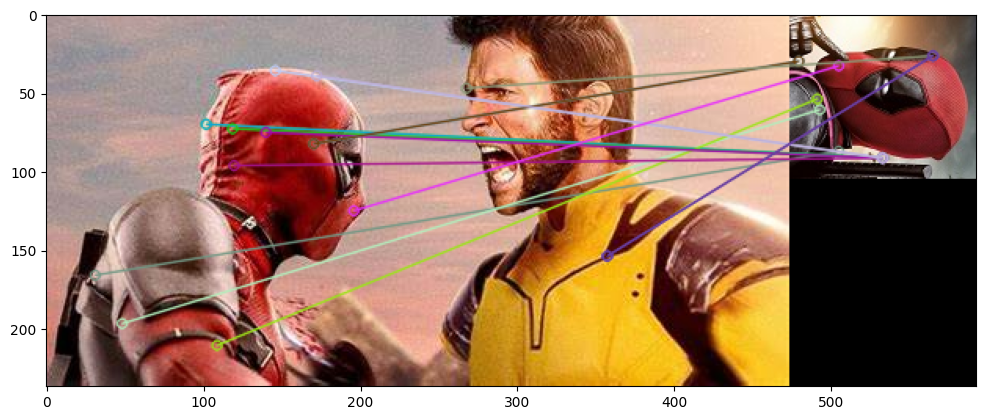

In [ ]:
#Muhamad Lutfi Alamsyah
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Gunakan gambar yang ada pada laptop masing-masing
img1 = cv2.imread('pool.jpg')  # Gambar yang dituju
img2 = cv2.imread('red.jpg')  # Gambar yang dicari

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Uji rasio matching sederhana
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Ubah nilai threshold rasio sesuai kebutuhan
        good.append([m])

# Menggambar hasil match pada gambar baru (img3)
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Tampilkan hasil menggunakan Matplotlib
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt


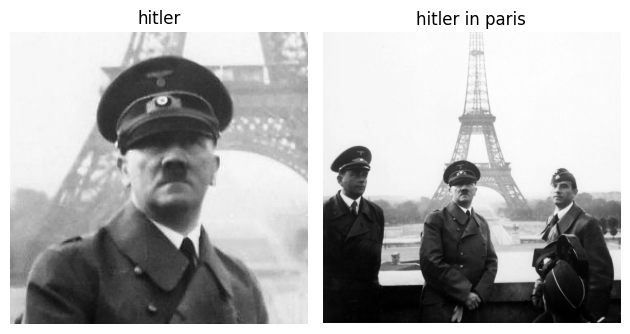

In [ ]:
from matplotlib import pyplot as plt
import cv2

# Load and convert colors to RGB for Matplotlib
hitler = cv2.imread('hitler.jpg')
hitler = cv2.cvtColor(hitler, cv2.COLOR_BGR2RGB)

paris = cv2.imread('paris.jpg')
paris = cv2.cvtColor(paris, cv2.COLOR_BGR2RGB)

# Display the images using subplots
plt.subplot(121)
plt.imshow(hitler)
plt.title('hitler')
plt.axis('off')  # Optional: turn off axis numbers and ticks

plt.subplot(122)
plt.imshow(paris)
plt.title('hitler in paris')
plt.axis('off')  # Optional: turn off axis numbers and ticks

plt.tight_layout()  # Optional: improve spacing between subplots
plt.show()


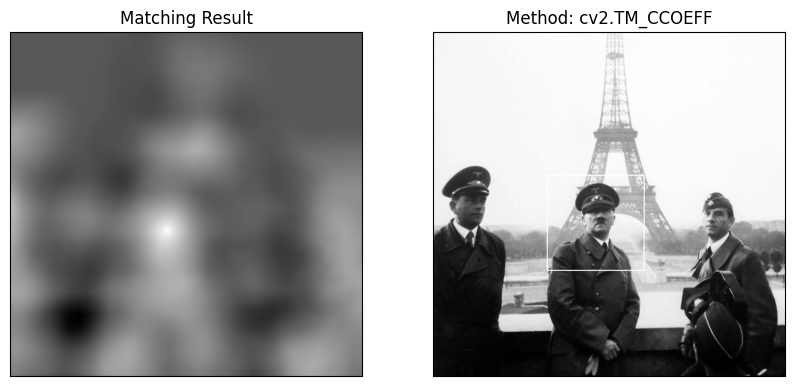

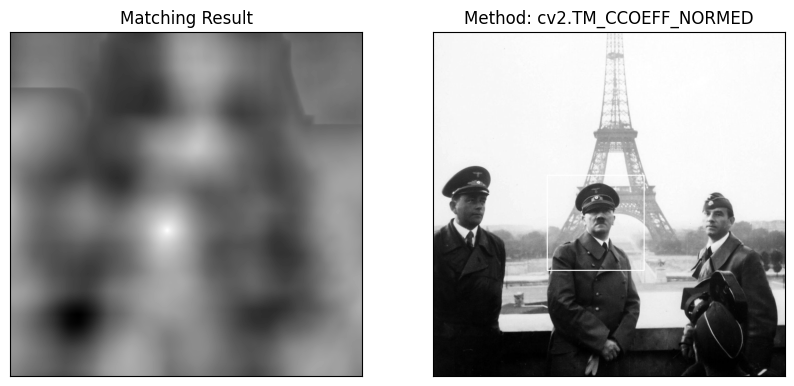

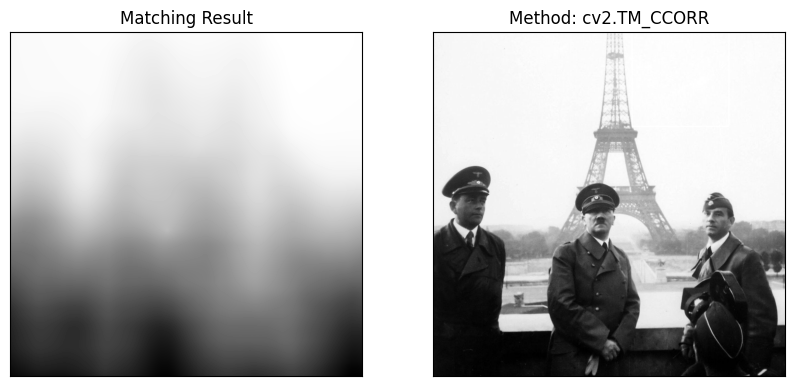

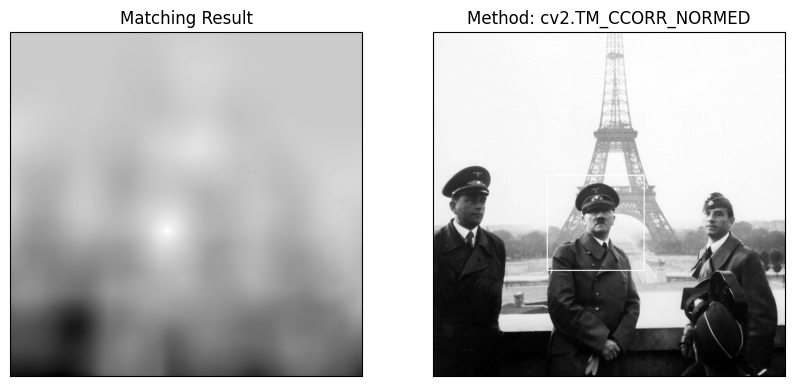

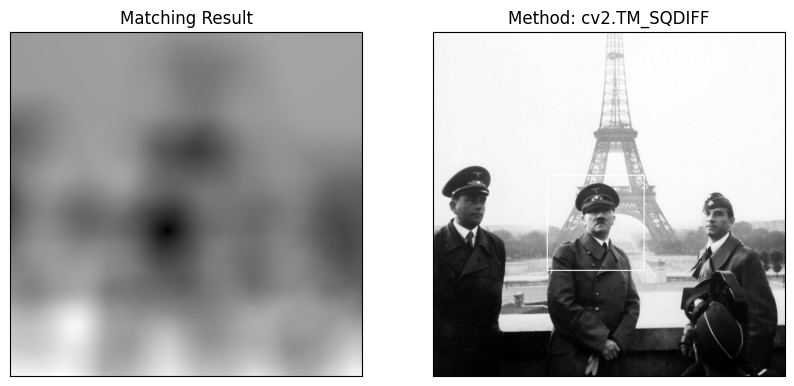

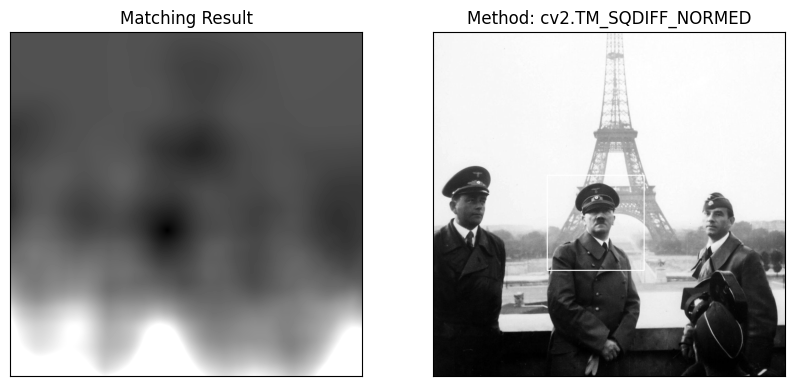

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the main image (grayscale)
img = cv2.imread('paris.jpg', 0)
img2 = img.copy()

# Load the template image (grayscale)
template = cv2.imread('hitler.jpg', 0)
w, h = template.shape[::-1]

# List of template matching methods
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Enlarge plot size
plt.rcParams["figure.figsize"] = (10, 10)

# Iterate over each method
for met in methods:
    img = img2.copy()
    method = eval(met)

    # Template matching
    res = cv2.matchTemplate(img, template, method)

    # Find minimum and maximum values and their locations
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = min_loc
    else:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc

    # Define bottom right of the rectangle
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the matched area
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    # Plot the results
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.title('Method: ' + met)  # Add title for the whole plot
    plt.show()


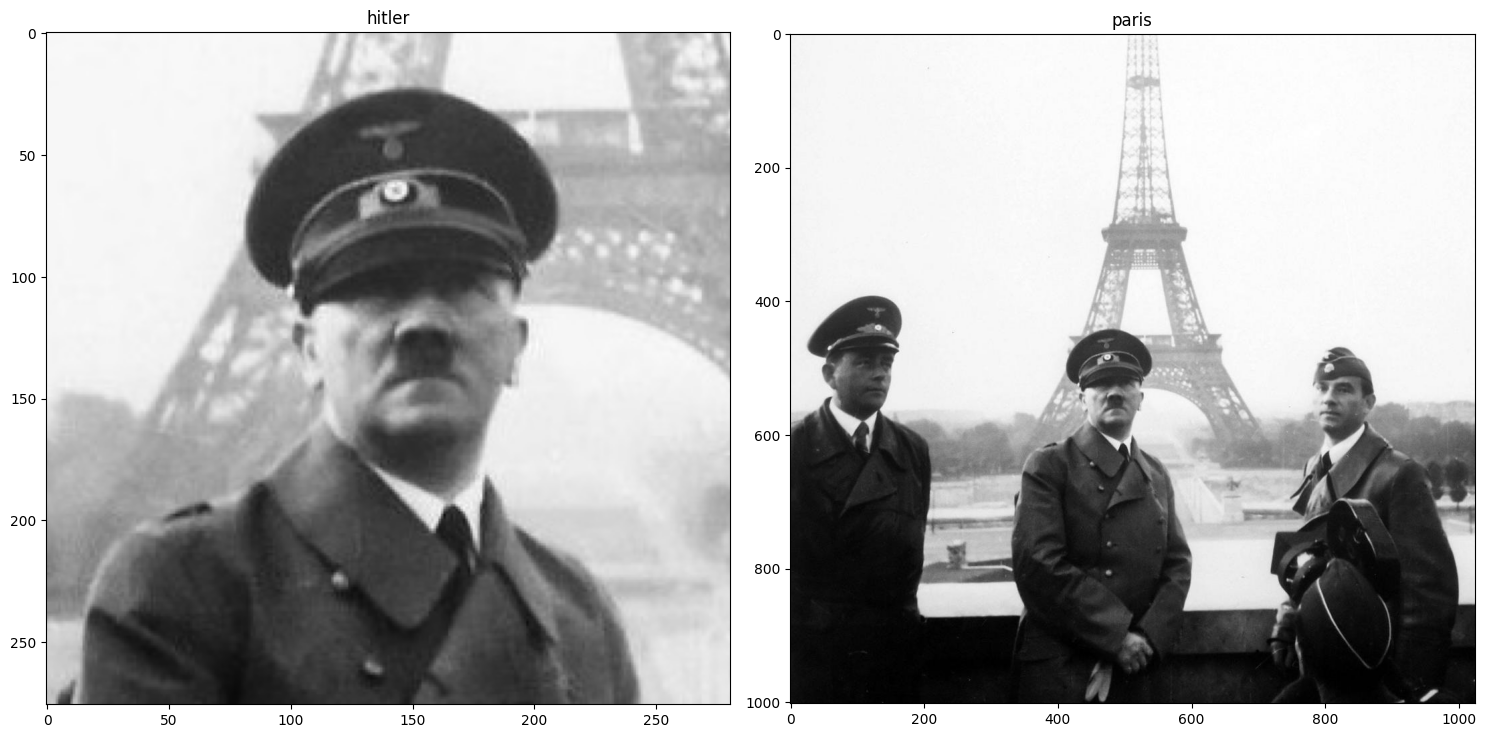

In [ ]:
from matplotlib import pyplot as plt
import cv2

# Load and convert colors to RGB for Matplotlib
hitler = cv2.imread('hitler.jpg')
hitler = cv2.cvtColor(hitler, cv2.COLOR_BGR2RGB)

paris = cv2.imread('paris.jpg')
paris = cv2.cvtColor(paris, cv2.COLOR_BGR2RGB)

# Display the images using subplots
plt.subplot(121)
plt.imshow(hitler)
plt.title('hitler')
plt.axis('on')  # Optional: turn off axis numbers and ticks

plt.subplot(122)
plt.imshow(paris)
plt.title('paris')
plt.axis('on')  # Optional: turn off axis numbers and ticks

plt.tight_layout()  # Optional: improve spacing between subplots
plt.show()


Total objects found: 5


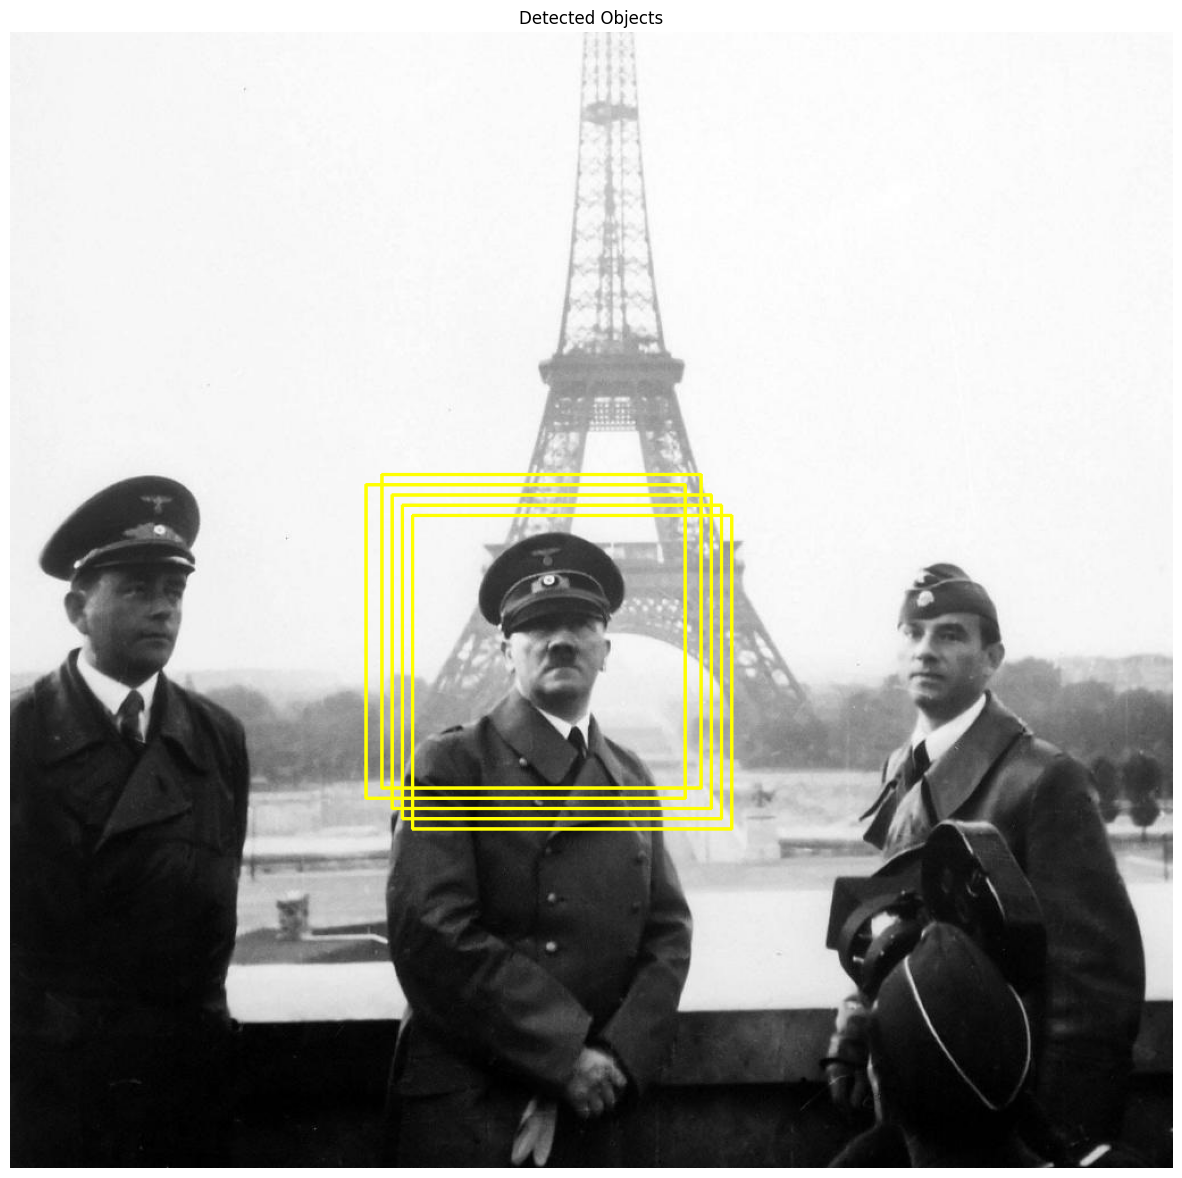

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the main image in color (BGR)
img_rgb = cv2.imread('paris.jpg')

# Convert the main image to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template image in grayscale
template = cv2.imread('hitler.jpg', 0)

# Get the size of the template (width and height)
w, h = template.shape[::-1]

# Perform template matching using normalized correlation coefficient method (TM_CCOEFF_NORMED)
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Set a threshold value for the matching result
threshold = 0.7  # Adjust this threshold as needed
loc = np.where(res >= threshold)

# Initialize empty lists to store locations of detected matches
lspoint = []
lspoint2 = []
count = 0  # Counter to keep track of the number of matches found

# Iterate over the detected locations
for pt in zip(*loc[::-1]):
    # Check if the point is already added (to avoid overlapping rectangles)
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Draw a yellow rectangle around the matched area
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

        # Add x and y coordinates to the lists
        lspoint.extend(range(pt[0] - 9, pt[0] + 9))
        lspoint2.extend(range(pt[1] - 9, pt[1] + 9))

        count += 1  # Increment the count of matches found

# Print the total number of objects found
print("Total objects found:", count)

# Convert BGR image to RGB for matplotlib
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Display the image with detected objects using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Detected Objects')
plt.show()
